# Predicting Graduation Rates - Cluster Analyses

## What's in this Notebook

The results of the regression and classification analyses identified several common top features that were most predictive of graduation rates, including: 
* Household Income
* Vacant vs Occupied Units in the community
* Unemployment levels
* Poverty levels
* Unmarried and non-family members in the household

These characteristics were common across both the Census and ACS data. 

In this notebook I use KMeans cluster analysis to see if I can find higher-order constructions among the top features identified. It's not terribly clean, but I can interpret there to be three clusters: Income or afluency variables, housing conditions, and head of household characteristics. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV

In [2]:
grad = pd.read_csv('./grad2.csv')

# Cluster Analysis / Unsupervised Learning:
The above analyses identified about 15 features in common as important features. To see if any of the Top Features would cluster into more broad topics, I tried some cluster analysis. I tried KMeans and DBSCAN. KMeans had the highest silhouette score with 3 clusters. 

In [3]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 

import seaborn as sns
from sklearn.cluster import KMeans

In [4]:
top_features = grad[['pct_Vacant_Units_CEN_2010',
'pct_Female_No_HB_CEN_2010',
'pct_No_Plumb_ACS_08_12',
'Med_HHD_Inc_ACS_08_12',
'pct_Mobile_Homes_ACS_08_12',
'pct_College_ACS_08_12',
'pct_Tot_Occp_Units_CEN_2010',
'pct_Prs_Blw_Pov_Lev_ACS_08_12',
'pct_Civ_unemp_16_24_ACS_08_12',
'pct_Not_MrdCple_HHD_ACS_08_12',
'pct_Vacant_Units_ACS_08_12',
'pct_Tot_Occp_Units_ACS_08_12', 
'pct_NonFamily_HHD_CEN_2010', 
'pct_Not_HS_Grad_ACS_08_12',
'pct_Civ_unemp_16p_ACS_08_12',
'pct_MrdCple_HHD_CEN_2010', 
'pct_PUB_ASST_INC_ACS_08_12'
]].copy()
top_features.head()

,pct_Vacant_Units_CEN_2010,pct_Female_No_HB_CEN_2010,pct_No_Plumb_ACS_08_12,Med_HHD_Inc_ACS_08_12,pct_Mobile_Homes_ACS_08_12,pct_College_ACS_08_12,pct_Tot_Occp_Units_CEN_2010,pct_Prs_Blw_Pov_Lev_ACS_08_12,pct_Civ_unemp_16_24_ACS_08_12,pct_Not_MrdCple_HHD_ACS_08_12,pct_Vacant_Units_ACS_08_12,pct_Tot_Occp_Units_ACS_08_12,pct_NonFamily_HHD_CEN_2010,pct_Not_HS_Grad_ACS_08_12,pct_Civ_unemp_16p_ACS_08_12,pct_MrdCple_HHD_CEN_2010,pct_PUB_ASST_INC_ACS_08_12
0,12.98,37.40,2.827763,12739,5.976864,2.917933,87.02,48.661880,66.577540,82.509225,12.917738,87.082262,36.71,41.762918,39.337298,20.17,3.173432
1,11.41,21.37,3.644444,14583,0.711111,6.028589,88.59,53.667426,69.642857,75.438596,13.866667,86.133333,50.15,28.775637,16.208791,23.61,4.127967
2,25.55,24.60,0.000000,16659,0.000000,11.396648,74.45,66.001331,58.914729,80.333952,28.419655,71.580345,43.25,18.100559,29.835391,27.58,6.307978
3,15.47,18.97,1.864181,17321,22.636485,6.990521,84.53,41.518808,14.893617,56.217163,23.968043,76.031957,30.45,20.260664,16.573557,46.09,5.253940
4,8.65,28.76,0.781657,18106,2.397082,16.257911,91.35,35.883595,31.804281,70.909091,8.285565,91.714435,31.89,25.474684,24.456233,34.98,2.329545


In [6]:
ss = StandardScaler()

In [7]:
scaled_features = ss.fit_transform(top_features)
scaled_features

array([[-0.04877778,  4.73117882, -0.11225899, ...,  6.2796072 ,
        -2.92131162,  0.25241965],
       [-0.19349383,  1.8502918 ,  0.07206916, ...,  1.57537795,
        -2.61323737,  0.62642165],
       [ 1.10987242,  2.43078245, -0.75049648, ...,  4.34696407,
        -2.2576982 ,  1.48058433],
       ...,
       [-0.15109295, -0.892212  , -0.39806345, ..., -0.95214263,
         1.07828022, -0.99098107],
       [ 1.39653926, -1.0916995 , -0.04455009, ..., -0.62935853,
         0.29913895, -0.99098107],
       [ 3.02620795, -1.3145504 ,  0.12795702, ..., -0.38650877,
         0.3080946 , -0.99098107]])

### KMeans
I looked at 2 to 8 clusters and 3 clusters had the largest silhouette score. 

I looked at scatter plots and bar chatts, and while it's not perfectly clean, here is how I am interpreting the three clusters.

*Red cluster: Related to income and college graduation, so perhaps an "affluency" cluster?

*Blue cluster: Related to housing condition (e.g., mobile home, plumbing)

*Purple cluster: Related to head of household characteristics (female, nonmarried)

In [8]:
model = KMeans(n_clusters = 3, random_state = 0).fit(scaled_features)

In [9]:
labels = model.labels_
print(labels)
clusters = model.cluster_centers_
clusters

labels[0:100]

[2 2 2 ... 0 1 1]


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 0,
       2, 2, 2, 2, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 0, 0, 1, 0, 2, 2, 1], dtype=int32)

In [10]:
silhouette_score(scaled_features, labels, metric='euclidean')

0.2413322982216741

In [11]:
top_features['labels'] = labels

### DBSCAN

I tried various epsilons and min_samples but had trouble getting it to converge on clusters. Mostly it either showed all 0's, or 0's and -1's. 

In [248]:
from sklearn.cluster import DBSCAN

In [249]:
dbscan = DBSCAN(eps=3, min_samples=3).fit(scaled_features)
core_samples = dbscan.core_sample_indices_
labels_dbscan = dbscan.labels_
silhouette_score(scaled_features, labels_dbscan)

0.4881987479718581

In [250]:
top_features['labels_dbscan'] = labels_dbscan

In [251]:
labels_dbscan[0:100]

array([ 0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

I visually examined various scatter plots with the KMeans clusters to see if I could make sense of the clusters. I also used barplots, even though that's not the typical way to look at clusters. With the barplots, I could at least see if any of the 3 clusters seemed larger for the feature. 

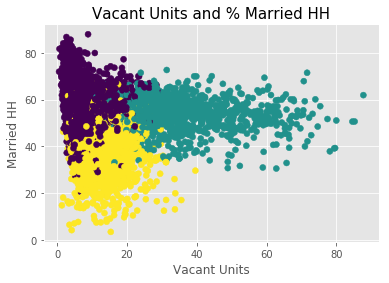

In [13]:
plt.scatter(x = top_features['pct_Vacant_Units_CEN_2010'], y = grad['pct_MrdCple_HHD_CEN_2010'], c = top_features['labels'])
plt.title('Vacant Units and % Married HH', fontsize=15)
plt.xlabel('Vacant Units')
plt.ylabel("Married HH")
plt.savefig('VacantByMarried.png')

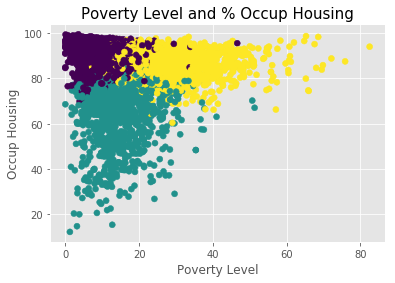

In [253]:
plt.scatter(x = top_features['pct_Prs_Blw_Pov_Lev_ACS_08_12'], y = grad['pct_Tot_Occp_Units_CEN_2010'], c = top_features['labels'])
plt.title('Poverty Level and % Occup Housing', fontsize=15)
plt.xlabel('Poverty Level')
plt.ylabel("Occup Housing")
plt.savefig('PovertyByOccup.png')

In [254]:
# plt.scatter(x = top_features['pct_Civ_unemp_16p_ACS_08_12'], y = grad['pct_NonFamily_HHD_CEN_2010'], c = top_features['labels'])
# plt.show()

In [255]:
# plt.scatter(x = top_features['pct_No_Plumb_ACS_08_12'], y = grad['pct_Mobile_Homes_ACS_08_12'], c = top_features['labels'])
# plt.show()

In [256]:
# plt.scatter(x = top_features['pct_College_ACS_08_12'], y = grad['Med_HHD_Inc_ACS_08_12'], c = top_features['labels'])
# plt.show()

In [257]:
# plt.scatter(x = top_features['pct_College_ACS_08_12'], y = grad['pct_Mobile_Homes_ACS_08_12'], c = top_features['labels'])
# plt.show()

### 3 higher-order clusters
It's not perfectly clean, but here is how I am interpreting the three clusters.

*Red cluster: Related to income and college graduation, so perhaps an "affluency" cluster?

*Blue cluster: Related to housing condition (e.g., mobile home, plumbing)

*Purple cluster: Related to head of household characteristics (female, nonmarried)

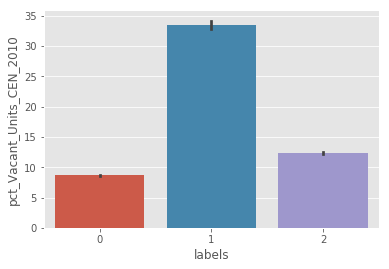

In [258]:
sns.barplot(y = 'pct_Vacant_Units_CEN_2010', x = 'labels', data = top_features)
plt.savefig('vacantunits.png')

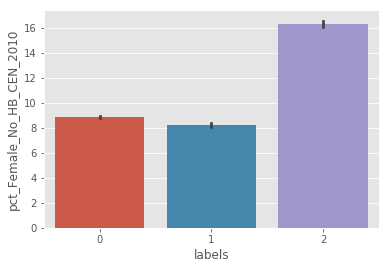

In [259]:
sns.barplot(y = 'pct_Female_No_HB_CEN_2010', x = 'labels', data = top_features)
plt.savefig('femaleunmarried.png')

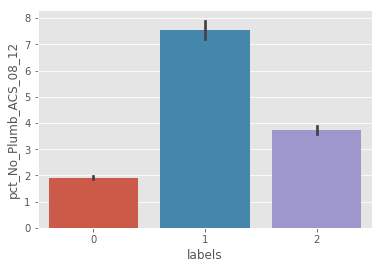

In [260]:
sns.barplot(y = 'pct_No_Plumb_ACS_08_12', x = 'labels', data = top_features)
plt.savefig('noplumbing.png')

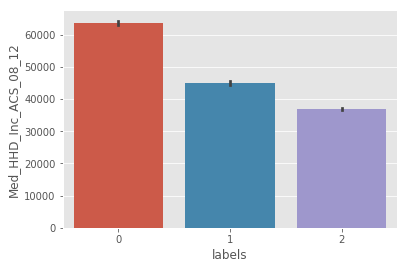

In [261]:
sns.barplot(y = 'Med_HHD_Inc_ACS_08_12', x = 'labels', data = top_features)
plt.savefig('medHHincome.png')

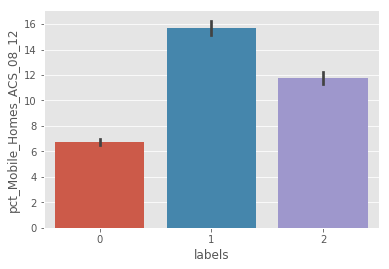

In [262]:
sns.barplot(y = 'pct_Mobile_Homes_ACS_08_12', x = 'labels', data = top_features)

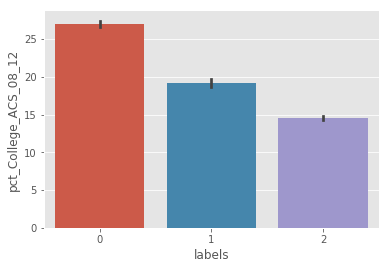

In [263]:
sns.barplot(y = 'pct_College_ACS_08_12', x = 'labels', data = top_features)
plt.savefig('college.png')

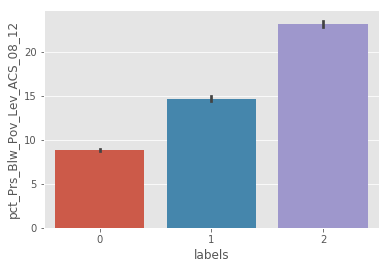

In [264]:
sns.barplot(y = 'pct_Prs_Blw_Pov_Lev_ACS_08_12', x = 'labels', data = top_features)

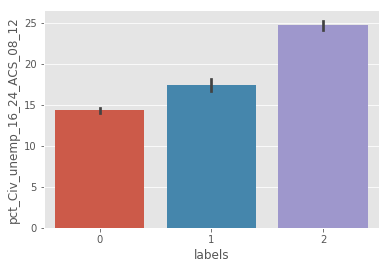

In [265]:
sns.barplot(y = 'pct_Civ_unemp_16_24_ACS_08_12', x = 'labels', data = top_features)

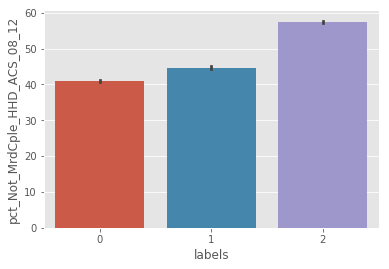

In [266]:
sns.barplot(y = 'pct_Not_MrdCple_HHD_ACS_08_12', x = 'labels', data = top_features)
plt.savefig('notmarried.png')

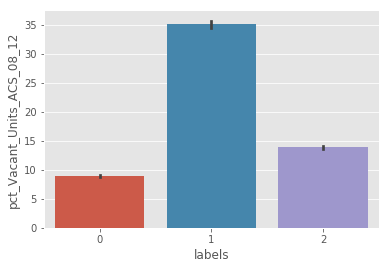

In [267]:
sns.barplot(y = 'pct_Vacant_Units_ACS_08_12', x = 'labels', data = top_features)

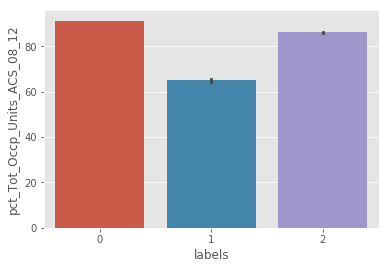

In [268]:
sns.barplot(y = 'pct_Tot_Occp_Units_ACS_08_12', x = 'labels', data = top_features)

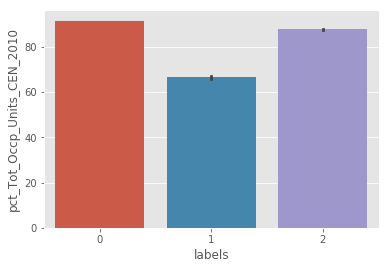

In [269]:
sns.barplot(y = 'pct_Tot_Occp_Units_CEN_2010', x = 'labels', data = top_features)

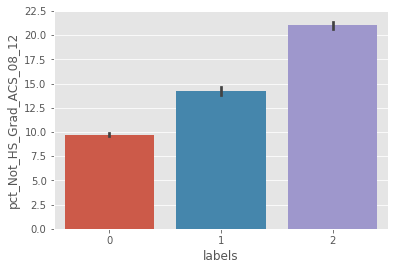

In [270]:
sns.barplot(y = 'pct_Not_HS_Grad_ACS_08_12', x = 'labels', data = top_features)

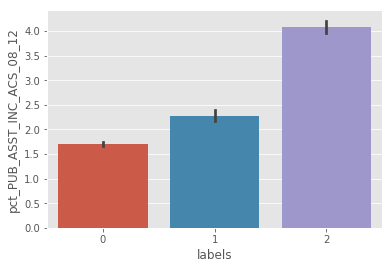

In [271]:
sns.barplot(y = 'pct_PUB_ASST_INC_ACS_08_12', x = 'labels', data = top_features)

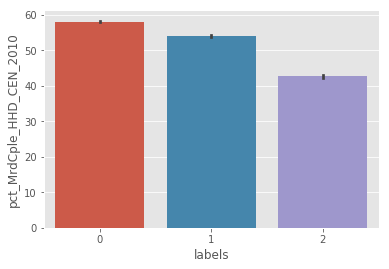

In [272]:
sns.barplot(y = 'pct_MrdCple_HHD_CEN_2010', x = 'labels', data = top_features)

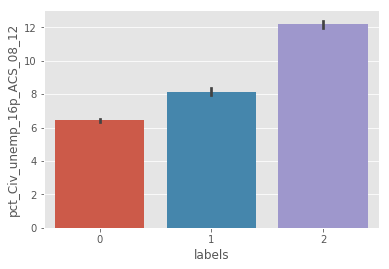

In [273]:
sns.barplot(y = 'pct_Civ_unemp_16p_ACS_08_12', x = 'labels', data = top_features)

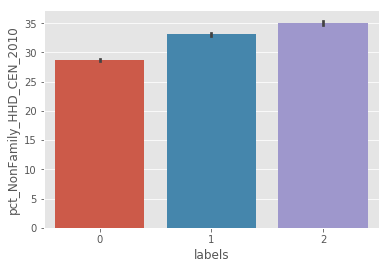

In [274]:
sns.barplot(y = 'pct_NonFamily_HHD_CEN_2010', x = 'labels', data = top_features)